Connected to social_learning (Python 3.9.18)

(6, 100)
objective_vals.shape:	 (6, 100) max_total_iterations== 100
cover ratio @ step log(n)==7:	 ['0.35', '0.36', '0.53', '0.72', '0.62', '0.88']
Save to ==>  ./output/plot_exp8newplot_datasrc_FB_2024-03-25-00-08-26.pdf


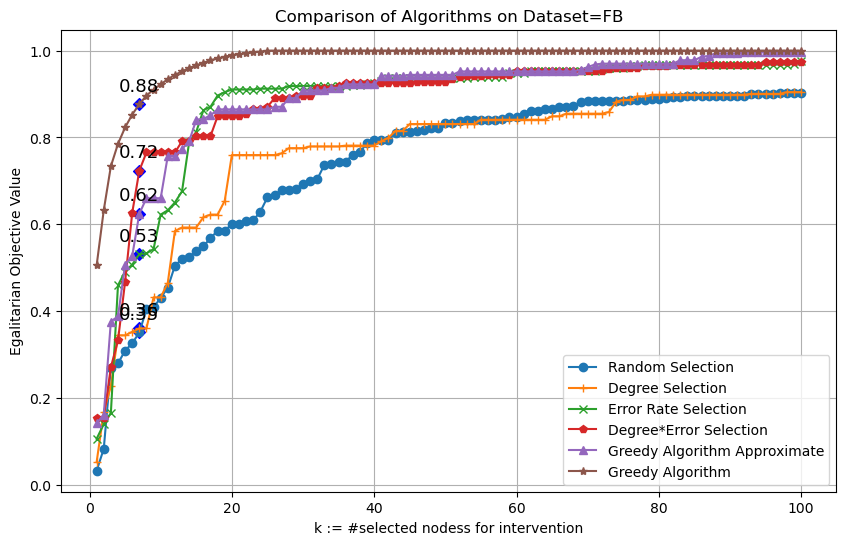

Avg#Selection==>0.5:	 [[11 11  5  5  4  0]],
Avg#Selection==>0.75:	 [[36 19 13  7 10  3]],
Avg#Selection==>0.9:	 [[93 92 18 31 29  8]],
Avg#Selection==>0.95:	 [[100 100  61  59  51  12]],
Avg#Selection==>0.99:	 [[100 100 100 100  87  19]],


In [1]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']

DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl"

}

YLabel='Egalitarian Objective Value'
XLabel='k := #selected nodess for intervention'

save_plot = True
dir_str = "./output/"

def main():
    ### pkl filename
    datasrc = "FB"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}')

    plt.legend()
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()

(6, 100)
objective_vals.shape:	 (6, 100) max_total_iterations== 100
cover ratio @ step log(n)==7:	 ['0.35', '0.36', '0.53', '0.72', '0.62', '0.88']
Save to ==>  ./output/exp8/plot_exp8newplot_datasrc_FB_2024-03-25-00-08-26.pdf


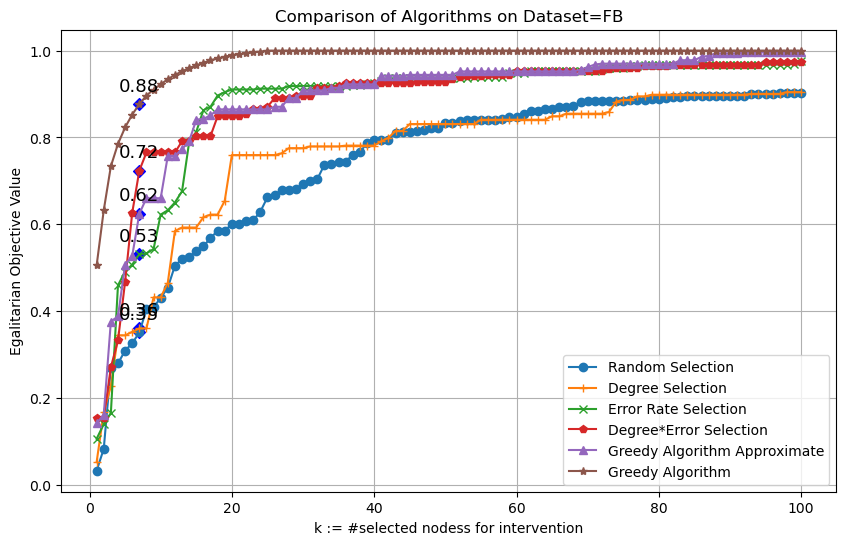

Avg#Selection==>0.5:	 [[11 11  5  5  4  0]],
Avg#Selection==>0.75:	 [[36 19 13  7 10  3]],
Avg#Selection==>0.9:	 [[93 92 18 31 29  8]],
Avg#Selection==>0.95:	 [[100 100  61  59  51  12]],
Avg#Selection==>0.99:	 [[100 100 100 100  87  19]],


In [2]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']

DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl"

}

YLabel='Egalitarian Objective Value'
XLabel='k := #selected nodess for intervention'

save_plot = True
dir_str = "./output/exp8/"

def main():
    ### pkl filename
    datasrc = "FB"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}')

    plt.legend()
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()

(6, 100)
objective_vals.shape:	 (6, 100) max_total_iterations== 100
cover ratio @ step log(n)==7:	 ['0.35', '0.36', '0.53', '0.72', '0.62', '0.88']
Save to ==>  ./output/exp8/plot_exp8newplot_datasrc_FB_2024-03-25-00-08-26.pdf


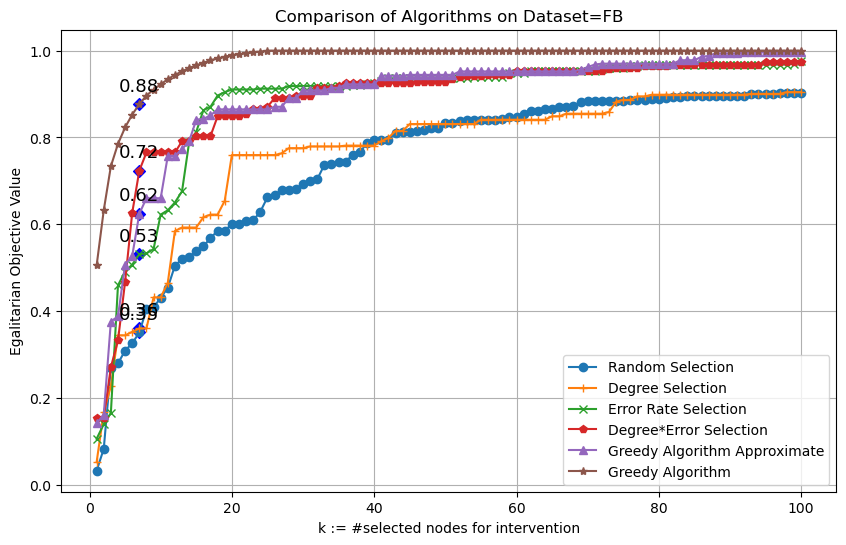

Avg#Selection==>0.5:	 [[11 11  5  5  4  0]],
Avg#Selection==>0.75:	 [[36 19 13  7 10  3]],
Avg#Selection==>0.9:	 [[93 92 18 31 29  8]],
Avg#Selection==>0.95:	 [[100 100  61  59  51  12]],
Avg#Selection==>0.99:	 [[100 100 100 100  87  19]],


In [3]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']

DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl"

}

YLabel='Egalitarian Objective Value'
XLabel='k := #selected nodes for intervention'

save_plot = True
dir_str = "./output/exp8/"

def main():
    ### pkl filename
    datasrc = "FB"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}')

    plt.legend()
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()

(6, 100)
objective_vals.shape:	 (6, 100) max_total_iterations== 100
cover ratio @ step log(n)==7:	 ['0.28', '0.49', '0.47', '0.49', '0.60', '0.65']
Save to ==>  ./output/exp8/plot_exp8newplot_datasrc_SOC_2024-03-25-05-22-13.pdf


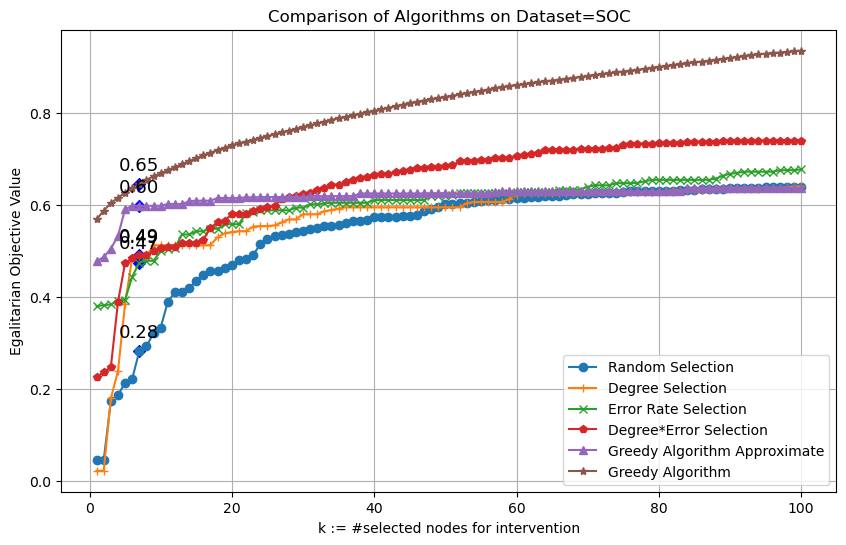

Avg#Selection==>0.5:	 [[23  8 10  9  2  0]],
Avg#Selection==>0.75:	 [[100 100 100 100 100  25]],
Avg#Selection==>0.9:	 [[100 100 100 100 100  80]],
Avg#Selection==>0.95:	 [[100 100 100 100 100 100]],
Avg#Selection==>0.99:	 [[100 100 100 100 100 100]],


In [4]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']

DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl"

}

YLabel='Egalitarian Objective Value'
XLabel='k := #selected nodes for intervention'

save_plot = True
dir_str = "./output/exp8/"

def main():
    ### pkl filename
    datasrc = "SOC"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}')

    plt.legend()
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()

(6, 100)
objective_vals.shape:	 (6, 100) max_total_iterations== 100
cover ratio @ step log(n)==7:	 ['0.35', '0.36', '0.53', '0.72', '0.62', '0.88']
Save to ==>  ./output/exp8/plot_exp8newplot_datasrc_FB_2024-03-25-00-08-26.pdf


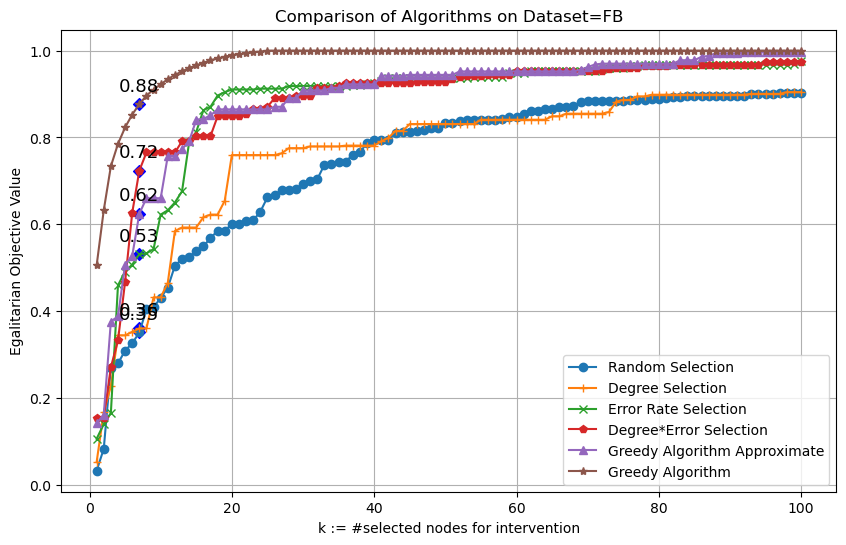

Avg#Selection==>0.5:	 [[11 11  5  5  4  0]],
Avg#Selection==>0.75:	 [[36 19 13  7 10  3]],
Avg#Selection==>0.9:	 [[93 92 18 31 29  8]],
Avg#Selection==>0.95:	 [[100 100  61  59  51  12]],
Avg#Selection==>0.99:	 [[100 100 100 100  87  19]],


In [5]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']

DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl"

}

YLabel='Egalitarian Objective Value'
XLabel='k := #selected nodes for intervention'

save_plot = True
dir_str = "./output/exp8/"

def main():
    ### pkl filename
    datasrc = "FB"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}')

    plt.legend()
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()

(6, 32)
objective_vals.shape:	 (6, 32) max_total_iterations== 32
cover ratio @ step log(n)==7:	 ['0.53', '0.42', '0.76', '0.89', '0.87', '1.00']
Save to ==>  ./output/exp8/plot_exp8newplot_datasrc_WS_2024-03-24-23-52-51.pdf


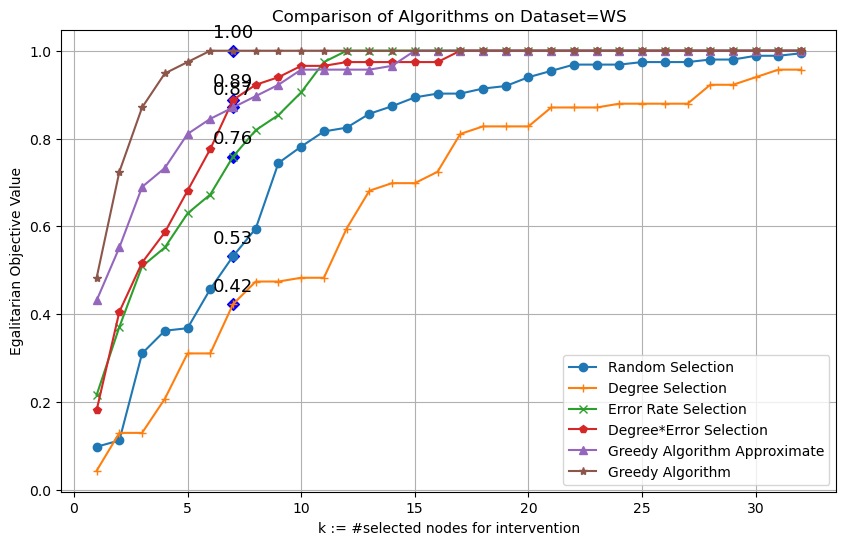

Avg#Selection==>0.5:	 [[ 6 11  2  2  1  1]],
Avg#Selection==>0.75:	 [[ 9 16  6  5  4  2]],
Avg#Selection==>0.9:	 [[15 27  9  7  8  3]],
Avg#Selection==>0.95:	 [[20 30 10  9  9  4]],
Avg#Selection==>0.99:	 [[31 32 11 16 14  5]],


In [7]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']


DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl",
    "WS":"./output/result_exp8_degree__FixedOptModel_DataSrc_watts_strogatz__RandomWFalse_Nodes128_Articles3_Sparsity0.73583984375_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.3020833333333333_2024-03-24-23-52-51.pkl",


}

YLabel='Egalitarian Objective Value'
XLabel='k := #selected nodes for intervention'

save_plot = True
dir_str = "./output/exp8/"

def main():
    ### pkl filename
    datasrc = "WS"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}')

    plt.legend()
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()

(6, 100)
objective_vals.shape:	 (6, 100) max_total_iterations== 100
cover ratio @ step log(n)==7:	 ['0.18', '0.12', '0.47', '0.37', '0.41', '0.58']
Save to ==>  ./output/exp8/plot_exp8newplot_datasrc_randomW_2024-03-24-23-55-11.pdf


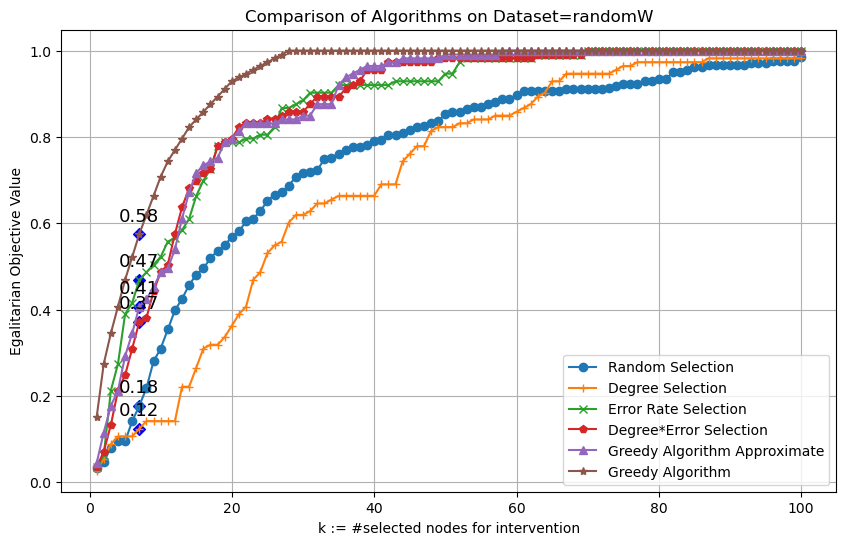

Avg#Selection==>0.5:	 [[16 24  8 10 11  5]],
Avg#Selection==>0.75:	 [[33 44 17 17 17 11]],
Avg#Selection==>0.9:	 [[60 63 30 35 34 18]],
Avg#Selection==>0.95:	 [[83 73 51 38 37 22]],
Avg#Selection==>0.99:	 [[100 100  62  62  49  26]],


In [9]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']


DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl",
    "WS":"./output/result_exp8_degree__FixedOptModel_DataSrc_watts_strogatz__RandomWFalse_Nodes128_Articles3_Sparsity0.73583984375_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.3020833333333333_2024-03-24-23-52-51.pkl",
    "randomW":"./output/result_exp8_degree__FixedOptModel_DataSrc_random_W__RandomWTrue_Nodes128_Articles3_Sparsity0.94842529296875_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.2942708333333333_2024-03-24-23-55-11.pkl",

}

YLabel='Egalitarian Objective Value'
XLabel='k := #selected nodes for intervention'

save_plot = True
dir_str = "./output/exp8/"

def main():
    ### pkl filename
    datasrc = "randomW"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}')

    plt.legend()
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()

(6, 13)
objective_vals.shape:	 (6, 13) max_total_iterations== 13
cover ratio @ step log(n)==7:	 ['0.88', '0.96', '1.00', '1.00', '1.00', '1.00']
Save to ==>  ./output/exp8/plot_exp8newplot_datasrc_BA_2024-03-24-23-49-15.pdf


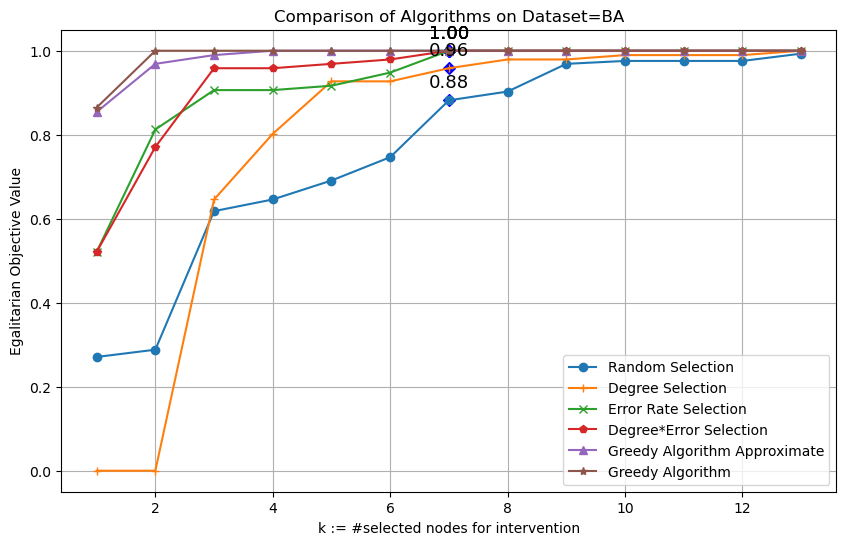

Avg#Selection==>0.5:	 [[2 2 0 0 0 0]],
Avg#Selection==>0.75:	 [[6 3 1 1 0 0]],
Avg#Selection==>0.9:	 [[7 4 2 2 1 1]],
Avg#Selection==>0.95:	 [[8 6 6 2 1 1]],
Avg#Selection==>0.99:	 [[12 12  6  6  3  1]],


In [10]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']


DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl",
    "WS":"./output/result_exp8_degree__FixedOptModel_DataSrc_watts_strogatz__RandomWFalse_Nodes128_Articles3_Sparsity0.73583984375_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.3020833333333333_2024-03-24-23-52-51.pkl",
    "randomW":"./output/result_exp8_degree__FixedOptModel_DataSrc_random_W__RandomWTrue_Nodes128_Articles3_Sparsity0.94842529296875_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.2942708333333333_2024-03-24-23-55-11.pkl",
    "BA": "./output/result_exp8_degree__FixedOptModel_DataSrc_barabasi_albert__RandomWFalse_Nodes128_Articles3_Sparsity0.374267578125_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.25_2024-03-24-23-49-15.pkl",
}

YLabel='Egalitarian Objective Value'
XLabel='k := #selected nodes for intervention'

save_plot = True
dir_str = "./output/exp8/"

def main():
    ### pkl filename
    datasrc = "BA"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}')

    plt.legend()
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()

(6, 100)
objective_vals.shape:	 (6, 100) max_total_iterations== 100
cover ratio @ step log(n)==7:	 ['0.11', '0.08', '0.22', '0.18', '0.18', '0.27']
Save to ==>  ./output/exp8/plot_exp8newplot_datasrc_ER_2024-03-24-23-38-47.pdf


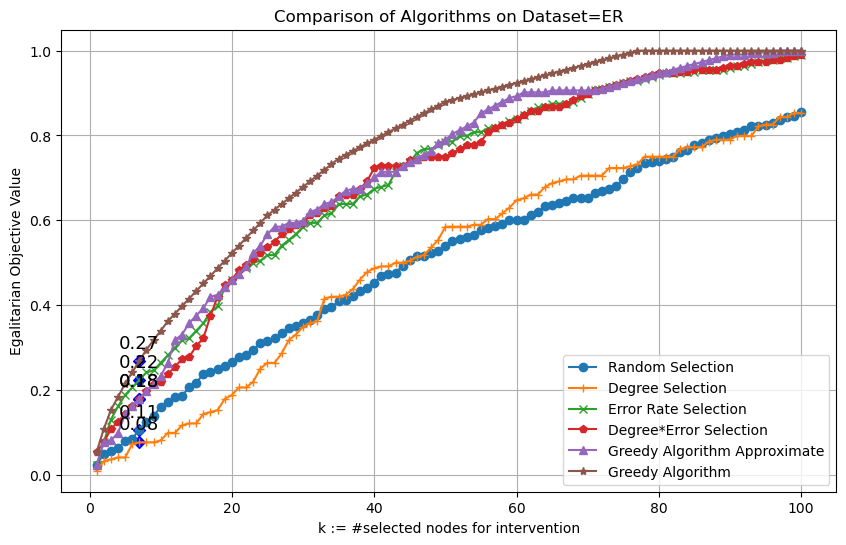

Avg#Selection==>0.5:	 [[44 44 23 22 22 18]],
Avg#Selection==>0.75:	 [[82 82 45 50 46 35]],
Avg#Selection==>0.9:	 [[100 100  70  70  60  54]],
Avg#Selection==>0.95:	 [[100 100  83  82  80  65]],
Avg#Selection==>0.99:	 [[100 100  99  99  89  74]],


In [11]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']


DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl",
    "WS":"./output/result_exp8_degree__FixedOptModel_DataSrc_watts_strogatz__RandomWFalse_Nodes128_Articles3_Sparsity0.73583984375_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.3020833333333333_2024-03-24-23-52-51.pkl",
    "randomW":"./output/result_exp8_degree__FixedOptModel_DataSrc_random_W__RandomWTrue_Nodes128_Articles3_Sparsity0.94842529296875_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.2942708333333333_2024-03-24-23-55-11.pkl",
    "BA": "./output/result_exp8_degree__FixedOptModel_DataSrc_barabasi_albert__RandomWFalse_Nodes128_Articles3_Sparsity0.374267578125_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.25_2024-03-24-23-49-15.pkl",
    "ER":"./output/result_exp8_degree__FixedOptModel_DataSrc_erdos_renyi__RandomWFalse_Nodes128_Articles5_Sparsity0.9786376953125_PrY10.625_P_range=(0.3, 0.9)_CountZNeg0.35_2024-03-24-23-38-47.pkl",
}

YLabel='Egalitarian Objective Value'
XLabel='k := #selected nodes for intervention'

save_plot = True
dir_str = "./output/exp8/"

def main():
    ### pkl filename
    datasrc = "ER"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}')

    plt.legend()
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()

(6, 100)
objective_vals.shape:	 (6, 100) max_total_iterations== 100
cover ratio @ step log(n)==7:	 ['0.48', '0.49', '0.54', '0.78', '0.64', '0.96']
Save to ==>  ./output/exp8/plot_exp8newplot_datasrc_WIKI_2024-03-25-00-33-35.pdf


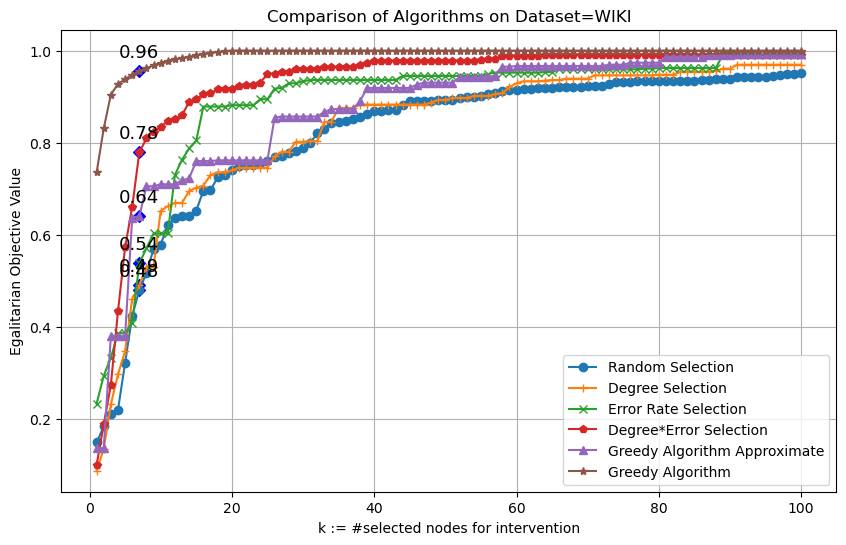

Avg#Selection==>0.5:	 [[7 7 6 4 5 0]],
Avg#Selection==>0.75:	 [[21 25 12  6 14  1]],
Avg#Selection==>0.9:	 [[54 53 25 15 38  2]],
Avg#Selection==>0.95:	 [[99 82 56 26 57  6]],
Avg#Selection==>0.99:	 [[100 100  88  63  89  15]],


In [12]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']


DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl",
    "WS":"./output/result_exp8_degree__FixedOptModel_DataSrc_watts_strogatz__RandomWFalse_Nodes128_Articles3_Sparsity0.73583984375_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.3020833333333333_2024-03-24-23-52-51.pkl",
    "randomW":"./output/result_exp8_degree__FixedOptModel_DataSrc_random_W__RandomWTrue_Nodes128_Articles3_Sparsity0.94842529296875_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.2942708333333333_2024-03-24-23-55-11.pkl",
    "BA": "./output/result_exp8_degree__FixedOptModel_DataSrc_barabasi_albert__RandomWFalse_Nodes128_Articles3_Sparsity0.374267578125_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.25_2024-03-24-23-49-15.pkl",
    "ER":"./output/result_exp8_degree__FixedOptModel_DataSrc_erdos_renyi__RandomWFalse_Nodes128_Articles5_Sparsity0.9786376953125_PrY10.625_P_range=(0.3, 0.9)_CountZNeg0.35_2024-03-24-23-38-47.pkl",
}

YLabel='Egalitarian Objective Value'
XLabel='k := #selected nodes for intervention'

save_plot = True
dir_str = "./output/exp8/"

def main():
    ### pkl filename
    datasrc = "WIKI"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}')

    plt.legend()
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()

(6, 100)
objective_vals.shape:	 (6, 100) max_total_iterations== 100
cover ratio @ step log(n)==7:	 ['0.48', '0.49', '0.54', '0.78', '0.64', '0.96']
Save to ==>  ./output/exp8/plot_exp8newplot_datasrc_WIKI_2024-03-25-00-33-35.pdf


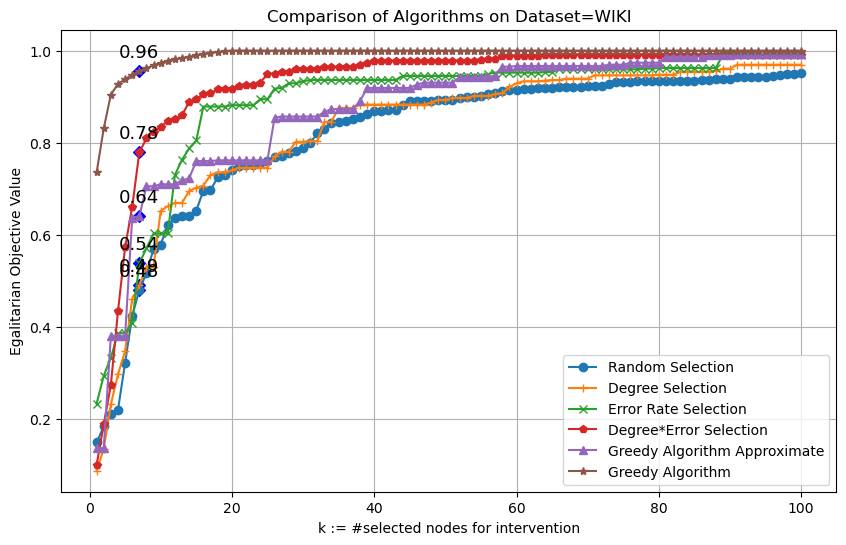

Avg#Selection==>0.5:	 [[8 8 7 5 6 1]],
Avg#Selection==>0.75:	 [[22 26 13  7 15  2]],
Avg#Selection==>0.9:	 [[55 54 26 16 39  3]],
Avg#Selection==>0.95:	 [[100  83  57  27  58   7]],
Avg#Selection==>0.99:	 [[101 101  89  64  90  16]],


In [13]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']


DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl",
    "WS":"./output/result_exp8_degree__FixedOptModel_DataSrc_watts_strogatz__RandomWFalse_Nodes128_Articles3_Sparsity0.73583984375_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.3020833333333333_2024-03-24-23-52-51.pkl",
    "randomW":"./output/result_exp8_degree__FixedOptModel_DataSrc_random_W__RandomWTrue_Nodes128_Articles3_Sparsity0.94842529296875_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.2942708333333333_2024-03-24-23-55-11.pkl",
    "BA": "./output/result_exp8_degree__FixedOptModel_DataSrc_barabasi_albert__RandomWFalse_Nodes128_Articles3_Sparsity0.374267578125_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.25_2024-03-24-23-49-15.pkl",
    "ER":"./output/result_exp8_degree__FixedOptModel_DataSrc_erdos_renyi__RandomWFalse_Nodes128_Articles5_Sparsity0.9786376953125_PrY10.625_P_range=(0.3, 0.9)_CountZNeg0.35_2024-03-24-23-38-47.pkl",
}

YLabel='Egalitarian Objective Value'
XLabel='k := #selected nodes for intervention'

save_plot = True
dir_str = "./output/exp8/"

def main():
    ### pkl filename
    datasrc = "WIKI"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}')

    plt.legend()
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_count += 1
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()

Connected to social_learning (Python 3.9.18)

(6, 100)
objective_vals.shape:	 (6, 100) max_total_iterations== 100
cover ratio @ step log(n)==7:	 ['0.48', '0.49', '0.54', '0.78', '0.64', '0.96']
Save to ==>  ./output/exp8/plot_exp8newplot_large_datasrc_WIKI_2024-03-25-00-33-35.pdf


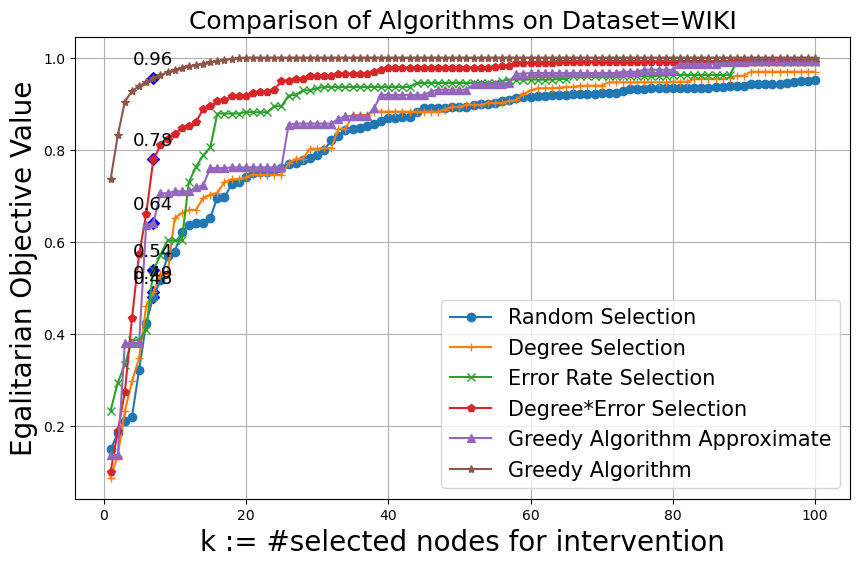

Avg#Selection==>0.5:	 [[8 8 7 5 6 1]],
Avg#Selection==>0.75:	 [[22 26 13  7 15  2]],
Avg#Selection==>0.9:	 [[55 54 26 16 39  3]],
Avg#Selection==>0.95:	 [[100  83  57  27  58   7]],
Avg#Selection==>0.99:	 [[101 101  89  64  90  16]],


In [1]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']


DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "CSPK": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_chesapeake.mtx_RandomWFalse_Nodes39_Articles3_Sparsity0.7508218277449047_PrY10.5128205128205128_P_range=(0.3, 0.9)_CountZNeg0.49572649572649574_2024-05-21-20-48-24.pkl",
    'BIO': "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_bio-celegansneural.mtx_RandomWFalse_Nodes297_Articles3_Sparsity0.44970467866090763_PrY10.5914702581369248_P_range=(0.3, 0.9)_CountZNeg0.2244668911335578_2024-05-21-20-50-49.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl",
    "WS":"./output/result_exp8_degree__FixedOptModel_DataSrc_watts_strogatz__RandomWFalse_Nodes128_Articles3_Sparsity0.73583984375_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.3020833333333333_2024-03-24-23-52-51.pkl",
    "randomW":"./output/result_exp8_degree__FixedOptModel_DataSrc_random_W__RandomWTrue_Nodes128_Articles3_Sparsity0.94842529296875_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.2942708333333333_2024-03-24-23-55-11.pkl",
    "PA": "./output/result_exp8_degree__FixedOptModel_DataSrc_barabasi_albert__RandomWFalse_Nodes128_Articles3_Sparsity0.374267578125_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.25_2024-03-24-23-49-15.pkl",
    "ER":"./output/result_exp8_degree__FixedOptModel_DataSrc_erdos_renyi__RandomWFalse_Nodes128_Articles5_Sparsity0.9786376953125_PrY10.625_P_range=(0.3, 0.9)_CountZNeg0.35_2024-03-24-23-38-47.pkl",
}

YLabel='Egalitarian Objective Value'
XLabel='k := #selected nodes for intervention'

save_plot = True
dir_str = "./output/exp8/"

def main():
    ### pkl filename
    datasrc = "WIKI"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_large_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel, fontsize=20)
    plt.ylabel(YLabel,fontsize=20)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}', fontsize=18)

    plt.legend(fontsize=15)
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_count += 1
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()

(6, 100)
objective_vals.shape:	 (6, 100) max_total_iterations== 100
cover ratio @ step log(n)==7:	 ['0.48', '0.49', '0.54', '0.78', '0.64', '0.96']
Save to ==>  ./output/exp8/plot_exp8newplot_large_datasrc_WIKI_2024-03-25-00-33-35.pdf


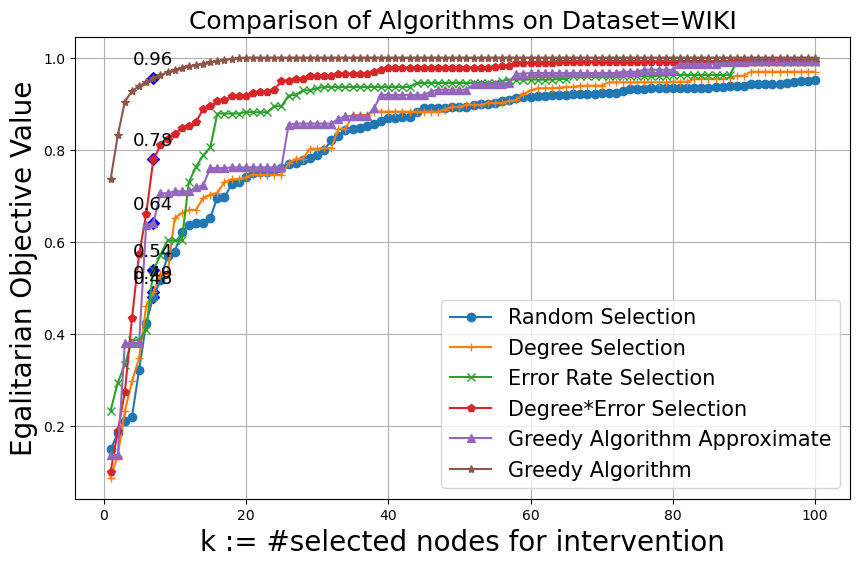

Avg#Selection==>0.5:	 [[8 8 7 5 6 1]],
Avg#Selection==>0.75:	 [[22 26 13  7 15  2]],
Avg#Selection==>0.9:	 [[55 54 26 16 39  3]],
Avg#Selection==>0.95:	 [[100  83  57  27  58   7]],
Avg#Selection==>0.99:	 [[101 101  89  64  90  16]],


In [2]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']


DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "CSPK": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_chesapeake.mtx_RandomWFalse_Nodes39_Articles3_Sparsity0.7508218277449047_PrY10.5128205128205128_P_range=(0.3, 0.9)_CountZNeg0.49572649572649574_2024-05-21-20-48-24.pkl",
    'BIO': "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_bio-celegansneural.mtx_RandomWFalse_Nodes297_Articles3_Sparsity0.44970467866090763_PrY10.5914702581369248_P_range=(0.3, 0.9)_CountZNeg0.2244668911335578_2024-05-21-20-50-49.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl",
    "WS":"./output/result_exp8_degree__FixedOptModel_DataSrc_watts_strogatz__RandomWFalse_Nodes128_Articles3_Sparsity0.73583984375_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.3020833333333333_2024-03-24-23-52-51.pkl",
    "randomW":"./output/result_exp8_degree__FixedOptModel_DataSrc_random_W__RandomWTrue_Nodes128_Articles3_Sparsity0.94842529296875_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.2942708333333333_2024-03-24-23-55-11.pkl",
    "PA": "./output/result_exp8_degree__FixedOptModel_DataSrc_barabasi_albert__RandomWFalse_Nodes128_Articles3_Sparsity0.374267578125_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.25_2024-03-24-23-49-15.pkl",
    "ER":"./output/result_exp8_degree__FixedOptModel_DataSrc_erdos_renyi__RandomWFalse_Nodes128_Articles5_Sparsity0.9786376953125_PrY10.625_P_range=(0.3, 0.9)_CountZNeg0.35_2024-03-24-23-38-47.pkl",
}

YLabel='Egalitarian Objective Value'
XLabel='k := #selected nodes for intervention'

save_plot = True
dir_str = "./output/exp8/"

def main():
    ### pkl filename
    datasrc = "WIKI"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_large_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel, fontsize=20)
    plt.ylabel(YLabel,fontsize=20)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}', fontsize=18)

    plt.legend(fontsize=15)
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_count += 1
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()

(6, 100)
objective_vals.shape:	 (6, 100) max_total_iterations== 100
cover ratio @ step log(n)==7:	 ['0.48', '0.49', '0.54', '0.78', '0.64', '0.96']
Save to ==>  ./output/exp8/plot_exp8newplot_large_datasrc_WIKI_2024-03-25-00-33-35.pdf


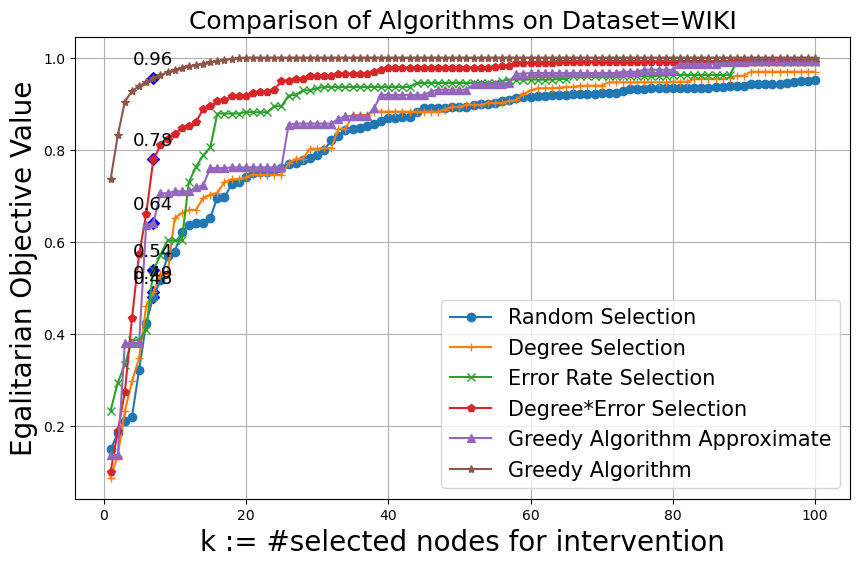

Avg#Selection==>0.5:	 [[8 8 7 5 6 1]],
Avg#Selection==>0.75:	 [[22 26 13  7 15  2]],
Avg#Selection==>0.9:	 [[55 54 26 16 39  3]],
Avg#Selection==>0.95:	 [[100  83  57  27  58   7]],
Avg#Selection==>0.99:	 [[101 101  89  64  90  16]],


In [3]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']


DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "CSPK": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_chesapeake.mtx_RandomWFalse_Nodes39_Articles3_Sparsity0.7508218277449047_PrY10.5128205128205128_P_range=(0.3, 0.9)_CountZNeg0.49572649572649574_2024-05-21-20-48-24.pkl",
    'BIO': "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_bio-celegansneural.mtx_RandomWFalse_Nodes297_Articles3_Sparsity0.44970467866090763_PrY10.5914702581369248_P_range=(0.3, 0.9)_CountZNeg0.2244668911335578_2024-05-21-20-50-49.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl",
    "WS":"./output/result_exp8_degree__FixedOptModel_DataSrc_watts_strogatz__RandomWFalse_Nodes128_Articles3_Sparsity0.73583984375_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.3020833333333333_2024-03-24-23-52-51.pkl",
    "randomW":"./output/result_exp8_degree__FixedOptModel_DataSrc_random_W__RandomWTrue_Nodes128_Articles3_Sparsity0.94842529296875_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.2942708333333333_2024-03-24-23-55-11.pkl",
    "PA": "./output/result_exp8_degree__FixedOptModel_DataSrc_barabasi_albert__RandomWFalse_Nodes128_Articles3_Sparsity0.374267578125_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.25_2024-03-24-23-49-15.pkl",
    "ER":"./output/result_exp8_degree__FixedOptModel_DataSrc_erdos_renyi__RandomWFalse_Nodes128_Articles5_Sparsity0.9786376953125_PrY10.625_P_range=(0.3, 0.9)_CountZNeg0.35_2024-03-24-23-38-47.pkl",
}

YLabel='Egalitarian Objective Value'
XLabel='k := #selected nodes for intervention'

save_plot = True
dir_str = "./output/exp8/"

def main():
    ### pkl filename
    datasrc = "WIKI"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_large_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel, fontsize=20)
    plt.ylabel(YLabel,fontsize=20)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}', fontsize=18)

    plt.legend(fontsize=15)
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_count += 1
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()

(6, 100)
objective_vals.shape:	 (6, 100) max_total_iterations== 100
cover ratio @ step log(n)==7:	 ['0.48', '0.49', '0.54', '0.78', '0.64', '0.96']
Save to ==>  ./output/exp8/plot_exp8newplot_large_datasrc_WIKI_2024-03-25-00-33-35.pdf


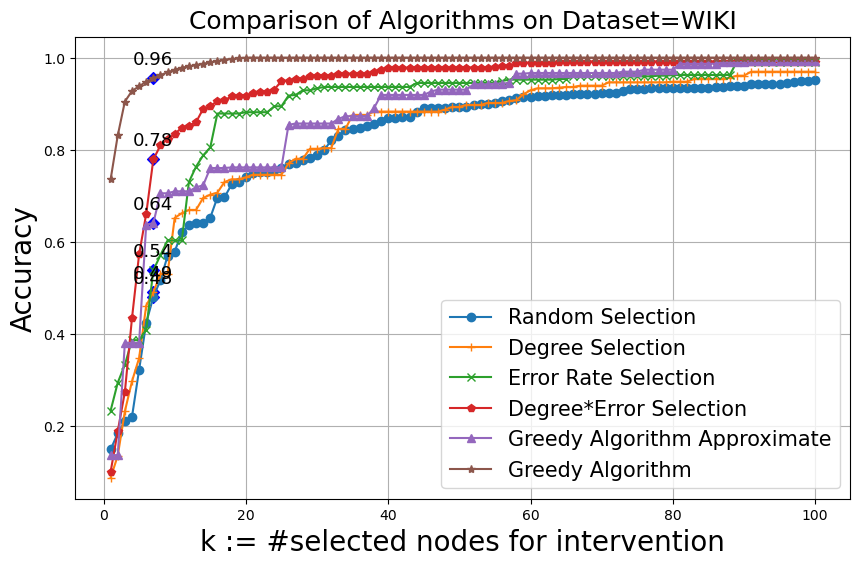

Avg#Selection==>0.5:	 [[8 8 7 5 6 1]],
Avg#Selection==>0.75:	 [[22 26 13  7 15  2]],
Avg#Selection==>0.9:	 [[55 54 26 16 39  3]],
Avg#Selection==>0.95:	 [[100  83  57  27  58   7]],
Avg#Selection==>0.99:	 [[101 101  89  64  90  16]],


In [4]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle as pkl
from datetime import datetime

from utils import *
from data_loader import *

n=128 
d = math.ceil(math.log2(n))

AlgorithmLabels = ['Random Selection', 'Degree Selection', 'Error Rate Selection','Degree*Error Selection', 'Greedy Algorithm Approximate','Greedy Algorithm']
AlgorithmMarkers = ['o', '+', 'x', 'p', '^', '*']


DATASrc_DIC = {
    "FB": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_fb-pages-food.edges_RandomWFalse_Nodes620_Articles3_Sparsity0.7511238293444329_PrY10.5876344086021505_P_range=(0.3, 0.9)_CountZNeg0.27043010752688174_2024-03-25-00-08-26.pkl",
    "SOC" : "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-hamsterster.edges_RandomWFalse_Nodes2426_Articles3_Sparsity0.660765926154486_PrY10.5948062654575432_P_range=(0.3, 0.9)_CountZNeg0.20967298708436383_2024-03-25-05-22-13.pkl",
    "CSPK": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_chesapeake.mtx_RandomWFalse_Nodes39_Articles3_Sparsity0.7508218277449047_PrY10.5128205128205128_P_range=(0.3, 0.9)_CountZNeg0.49572649572649574_2024-05-21-20-48-24.pkl",
    'BIO': "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_bio-celegansneural.mtx_RandomWFalse_Nodes297_Articles3_Sparsity0.44970467866090763_PrY10.5914702581369248_P_range=(0.3, 0.9)_CountZNeg0.2244668911335578_2024-05-21-20-50-49.pkl",
    "WIKI": "./output/result_exp8_degree__FixedOptModel_DataSrc_real_dataset_soc-wiki-Vote.mtx_RandomWFalse_Nodes889_Articles3_Sparsity0.6593574003474537_PrY10.5841769778777652_P_range=(0.3, 0.9)_CountZNeg0.25984251968503935_2024-03-25-00-33-35.pkl",
    "WS":"./output/result_exp8_degree__FixedOptModel_DataSrc_watts_strogatz__RandomWFalse_Nodes128_Articles3_Sparsity0.73583984375_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.3020833333333333_2024-03-24-23-52-51.pkl",
    "randomW":"./output/result_exp8_degree__FixedOptModel_DataSrc_random_W__RandomWTrue_Nodes128_Articles3_Sparsity0.94842529296875_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.2942708333333333_2024-03-24-23-55-11.pkl",
    "PA": "./output/result_exp8_degree__FixedOptModel_DataSrc_barabasi_albert__RandomWFalse_Nodes128_Articles3_Sparsity0.374267578125_PrY10.5859375_P_range=(0.3, 0.9)_CountZNeg0.25_2024-03-24-23-49-15.pkl",
    "ER":"./output/result_exp8_degree__FixedOptModel_DataSrc_erdos_renyi__RandomWFalse_Nodes128_Articles5_Sparsity0.9786376953125_PrY10.625_P_range=(0.3, 0.9)_CountZNeg0.35_2024-03-24-23-38-47.pkl",
}

YLabel='Accuracy'
XLabel='k := #selected nodes for intervention'

save_plot = True
dir_str = "./output/exp8/"

def main():
    ### pkl filename
    datasrc = "WIKI"
    pkl_filename = DATASrc_DIC[datasrc]

    # fstr = f"{py_fname}_FixedOptModel_DataSrc_{datasrc}_{file_path}_RandomW{randomW}_Nodes{n}_Articles{Z.shape[1]}_Sparsity{np.sum(W==0)/(W.size)}_PrY1{np.sum(Y==1)/(Y.size)}_P_range={Prange}_CountZNeg{m/Z.size}"


    save_plot_fstr = f"exp8newplot_large_datasrc_{datasrc}"
    

    with open(pkl_filename, 'rb') as file:
        pkl_results = pickle.load(file)

    # Access the attributes of the loaded class instance
    graph = pkl_results["graph"]
    filename = pkl_results["filename"]
    matrixW = pkl_results["matrixW"]
    random_seed = pkl_results["random_seed"]
    nodesize_n = pkl_results["nodesize_n"]
    articlesize_k = pkl_results["articlesize_k"]
    sparsity_rho = pkl_results["sparsity_rho"]
    probability1 = pkl_results["probability1"]
    negative_size = pkl_results["negative_size"]
    total_iteration = pkl_results["total_iteration"]
    timestamp = pkl_results["timestamp"]
    FJ_iters = pkl_results["FJ_iters"]
    repeat_exp = pkl_results["repeat_exp"]
    repeatk = pkl_results["repeatk"]


    results = pkl_results["results"]
    print(results.shape)
    max_total_iterations = results.shape[1]

    mask = MASK
    algorithms_count = np.sum(np.array(MASK))
    objective_vals = results 
    objective_reps_vals = np.ones_like(objective_vals)    

    print("objective_vals.shape:\t" , objective_vals.shape, "max_total_iterations==",max_total_iterations) ### [AlgorithmCount X max_total_iterations]
    print(f"cover ratio @ step log(n)=={d}:\t", [f"{objective_vals[alg_id, d-1]:.2f}" for alg_id in range(algorithms_count)])

    # Plotting
    t_values = range(1, max_total_iterations + 1)
    # Annotating the points
    offset = 3/100.  # Adjust this offset to position your text
    x_highlight = d
    y_highlights = objective_vals[:, x_highlight - 1]
    plt.figure(figsize=(10, 6))
    for alg_id in range(algorithms_count):
        plt.plot(t_values, objective_vals[alg_id, :], label=AlgorithmLabels[alg_id], marker=AlgorithmMarkers[alg_id])
        y_highlight = y_highlights[alg_id] 
        plt.text(x_highlight, y_highlight + offset, f'{y_highlight:.2f}', fontsize=13, ha='center')

    # plt.plot(t_values, objective_greedy[:max_total_iterations], label='Greedy Algorithm', marker='x')
    # plt.plot(t_values, objective_greedy_appro[:max_total_iterations], label='Greedy Algorithm Approximate', marker='^')
    # plt.plot(t_values, objective_random[:max_total_iterations], label='Random Picking', marker='o')
    # plt.plot(t_values, objective_degree[:max_total_iterations], label='Degree Selection', marker='+')


    
    # y_greedy = objective_greedy[x_highlight - 1]  # Adjusting index for 0-based indexing
    # y_greedy_appro = objective_greedy_appro[x_highlight - 1]
    # y_random = objective_random[x_highlight - 1]

    

    # plt.scatter([x_highlight]*algorithms_count, [y_greedy, y_greedy_appro, y_random], color='red')
    plt.scatter([x_highlight]*algorithms_count, y_highlights, color='blue', marker='D')


    # plt.text(x_highlight, y_greedy + offset, f'{y_greedy:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_greedy_appro + offset, f'{y_greedy_appro:.2f}', fontsize=13, ha='center')
    # plt.text(x_highlight, y_random + offset, f'{y_random:.2f}', fontsize=13, ha='center')


    plt.xlabel(XLabel, fontsize=20)
    plt.ylabel(YLabel,fontsize=20)
    plt.title(f'Comparison of Algorithms on Dataset={datasrc}', fontsize=18)

    plt.legend(fontsize=15)
    plt.grid(True)

    if save_plot:
        plot_fstr = f"{dir_str}plot_{save_plot_fstr}_{timestamp}.pdf"        
        plt.savefig(plot_fstr, format='pdf')
        print("Save to ==> ", plot_fstr)    

    plt.show()

    # thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    thresholds = [0.5, 0.75, 0.9, 0.95, 0.99]
    selection_up2thresholds = np.zeros([algorithms_count ,len(thresholds)])
    # step99s_greedy, step99s_greedy_appros, step99s_randoms, step99s_degrees  = [], [], [], []
    for id, threshold in enumerate(thresholds):
        selection_count = np.sum(objective_vals<=threshold, axis=1)
        selection_count += 1
        selection_up2thresholds[:, id] = selection_count
        print(f"Avg#Selection==>{threshold}:\t [{selection_count}],"  )


if __name__ == '__main__':
    main()